<a href="https://colab.research.google.com/github/ZordoC/Credit-Default/blob/master/Final-for-real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 
 
 
 <h5>
    <font size = 7 color = 'white'  >  
      
      
  <h1> <center>  Credit One Company Revival   </center></ h1>
 
  </font>
  </h5>
  <br>
  <br>
  <br>
  
 Over the  past year or so Credit one has seen an increase in the number of customers who have defaulted on loans they have secured from various partners, and Credit On, as their credit scoring service needs to fix this issued as soon as possible or this could be the end of the company ! 

      
  *  The problem 
   
       *  Increase in customer default rates - This is bad for Credit One since we approve the customers for loans in the first place.
       * Revenue and customer loss for clients and, eventually, loss of clients for Credit One.   
   
  <br> 
  
  *  The Question we want to answer : 
   
       * How do you ensure that customers can/will pay their loans? Can we do this?
       
 <br>
 
   
  *  Thing we already know of  
   
       1.  We cannot control customer spending habits
       2. We cannot always go from what we find in our analysis to the underlying "why"
       3. We must on the problem(s) we can solve: What attributes in the data can we deem to be statistically significant to the problem at hand?
       4. What concrete information can we derive from the data we have?
       5. What proven methods can we use to uncover more information and why?
       
       
      
<br>
<br>
<br>
      
      
 <h5>
    <font size = 6 color = 'white'  >  
      
      
  <h1> <center>  The Data-Set    </center></ h1>
 
  </font>
  </h5>
  
  <br>
  <br>
  <br> 
       
  Before starting any project , it's normal practive to get acquainted with the data-set , know what each variables mean and what values they represent, otherwise you don't know what you are doing , you can't draw conclusions based on metrics you don't know , after some research trough the web I found this :
  
 <br>
 
 
 
  *  There are 25 variables:  
   
       *  ID: ID of each client
       *  LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
       *  SEX: Gender (1=male, 2=female)
       *  EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
       * MARRIAGE: Marital status (1=married, 2=single, 3=others)
       * AGE: Age in years
       * PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
       *  PAY_2: Repayment status in August, 2005 (scale same as above)
       * PAY_3: Repayment status in July, 2005 (scale same as above)
       * PAY_4: Repayment status in June, 2005 (scale same as above)
       * PAY_5: Repayment status in May, 2005 (scale same as above)
       * PAY_6: Repayment status in April, 2005 (scale same as above)
       * BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
       * BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) 
       * BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
       * BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
       * BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
       * BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
       * PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
       * PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
       * PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
       * PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
       * PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
       * PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
       * default.payment.next.month: Default payment (1=yes, 0=no)
      
  
  
  <br>
  <br> 
  
  <h5>
    <font size = 6 color = 'white'  >  
      
      
  <h1> <center>  My Plan of atack     </center></ h1>
 
  </font>
  </h5>
       
 <br>
 <br>
 
 
From doing this for the past few months I came to the conclusion that everyone's process is different, and that there is no right specific "cheat sheet" for data science work flow's , they follow a skeletorn , but there are time that for example you might want to do explore the raw data before pre processing it ,  create a dummy model before cleaning or not , this is the workflow I followed for this project: 

 
 
 1. Understand the meaning of each feature, and understand the problem.
 2. Dummy model 
 3. Data Exploration 
 4. Data Cleaning 
 5. Feature Engineering 
 6. Apply the dummy model again
 7. Stop and reframe 
 8. Wrap up solutions 
 9. Choose models 
 10. Hypertuning 
 
 
 This is an interative process you might be in step 9 and suddenly get a new idea or result that forces you to go to step 1  ! This is just a guideline for me there is no order no loop , you just try things, jump around, research new things  and hopefully by the end of the project you have cleared all points , and are happy with the results.
 
 
 
 
 
 
    
   

In [0]:
# The Basic-Kit 
import pandas as pd 
import numpy as np 
from IPython.display import display
from IPython.display import HTML
from collections import Counter

# Cleaning / pre-processing 


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils import resample

# Vizualizations 


import matplotlib.pyplot as plt 
import seaborn as sns 



# Modelling 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import train_test_split






    
 <h5>
    <font size = 6 color = 'white'  >  
      
      
  <h1> <center>  Functions    </center></ h1>
 
  </font>
  </h5>
  <br>
  <br>
  <br>
  <center>This section is reserved to  the functions used over the course of this project 
  
 <br>
  <br>

In [0]:
def correlation(df, threshold):
    df = df.copy(deep=True) # This is very important, if you dont do this you will update the df you passed through the function
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset

    return df

In [0]:
def missing_percentage_data(df):
    
    
    missing_values_count = df.isnull().sum() # The actual code line that returns the number of missing values that you have per columns 

    total_cells = np.product(df.shape) # multiplies the shape of the dataframe ie # columns * # rows 
    
    total_missing = missing_values_count.sum() # sums all missing values in each columns 

    missing_percent = (total_missing/total_cells) * 100  # simples division to get the percentage 

    print('Percent of missing data of = {}%'.format(missing_percent))
    
    return 

In [0]:
def near_zero_var(df,tresh):
    df = df.copy(deep=True) 
    
    cols = df._get_numeric_data().columns # forces to get only numerical data 
    
    for col in cols :
      if df[col].var() <= tresh :
        del df[col]
    
    return df 
    
    

In [0]:
def X_Y (df,label): # Introduce label in quotes ex: "label"
    
    
    X = df[[col for col in list(df.columns) if col != label  ]]  # list comprenhension, iterates thought all columns names except the label  
    Y = df[label] 
    
    return X,Y 


In [0]:
def make_labels(ax, boxplot):

    # Grab the relevant Line2D instances from the boxplot dictionary
    iqr = boxplot['boxes'][0]
    caps = boxplot['caps']
    med = boxplot['medians'][0]
    fly = boxplot['fliers'][0]

    # The x position of the median line
    xpos = med.get_xdata()

    # Lets make the text have a horizontal offset which is some 
    # fraction of the width of the box
    xoff = 0.10 * (xpos[1] - xpos[0])

    # The x position of the labels
    xlabel = xpos[1] + xoff

    # The median is the y-position of the median line
    median = med.get_ydata()[1]

    # The 25th and 75th percentiles are found from the
    # top and bottom (max and min) of the box
    pc25 = iqr.get_ydata().min()
    pc75 = iqr.get_ydata().max()

    # The caps give the vertical position of the ends of the whiskers
    capbottom = caps[0].get_ydata()[0]
    captop = caps[1].get_ydata()[0]

    # Make some labels on the figure using the values derived above
    ax.text(xlabel, median,
            'Median = {:6.3g}'.format(median), va='center')
    ax.text(xlabel, pc25,
            '25th percentile = {:6.3g}'.format(pc25), va='center')
    ax.text(xlabel, pc75,
            '75th percentile = {:6.3g}'.format(pc75), va='center')
    ax.text(xlabel, capbottom,
            'Bottom cap = {:6.3g}'.format(capbottom), va='center')
    ax.text(xlabel, captop,
            'Top cap = {:6.3g}'.format(captop), va='center')

    # Many fliers, so we loop over them and create a label for each one
    


    
 <h5>
    <font size = 6 color = 'white'  >  
      
      
  <h1> <center>  Getting acquainted with the data     </center></ h1>
 
  </font>
  </h5>
  <br>
  <br>
  <br>
  <center>Let's try to understand a little bit about our data , distributions , weird/missing values values 
  
 <br>
  <br>

In [0]:
url = 'https://raw.githubusercontent.com/ZordoC/Credit-Default/master/data.csv'

df = pd.read_csv(url,header = 1)

In [94]:
display(df.head())

print("\n")
print("\n")


display(df.describe())

print("\n")
print("\n")

display(df.info())



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6           

None

First things first , let's assign the data types to their right data types , and drop the ID , because it's the same as the index 

In [95]:
df = df.rename(columns = { 'default payment next month' : 'default_payment' })



df['SEX'] = df.SEX.astype('category')
df['MARRIAGE'] = df.MARRIAGE.astype('category')
df['EDUCATION'] = df.EDUCATION.astype('category')
df['default_payment'] = df.default_payment.astype('category')
df['PAY_0'] = df.PAY_0.astype('category')
df['PAY_2'] = df.PAY_2.astype('category')
df['PAY_3'] = df.PAY_3.astype('category')
df['PAY_4'] = df.PAY_4.astype('category')
df['PAY_5'] = df.PAY_5.astype('category')
df['PAY_6'] = df.PAY_6.astype('category')

df = df.drop(['ID'], axis = 1 )

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL          30000 non-null int64
SEX                30000 non-null category
EDUCATION          30000 non-null category
MARRIAGE           30000 non-null category
AGE                30000 non-null int64
PAY_0              30000 non-null category
PAY_2              30000 non-null category
PAY_3              30000 non-null category
PAY_4              30000 non-null category
PAY_5              30000 non-null category
PAY_6              30000 non-null category
BILL_AMT1          30000 non-null int64
BILL_AMT2          30000 non-null int64
BILL_AMT3          30000 non-null int64
BILL_AMT4          30000 non-null int64
BILL_AMT5          30000 non-null int64
BILL_AMT6          30000 non-null int64
PAY_AMT1           30000 non-null int64
PAY_AMT2           30000 non-null int64
PAY_AMT3           30000 non-null int64
PAY_AMT4           30000 non-null int64
PAY_AMT5           30000

Just a small  comment here , have you seen the sudden drop in memory usage ? (around 35%)  , imagine if you had a data set with  millions of rows and hundreds of features ? <br> You'd probably  be unable to read the dataframe even if all features were categorical ! 

Here's a cool pandas trick that le'ts you read dataframes and at the same type specify  column's types:

    1.Create a dictionary like this dtypes = { 'SEX' : 'categorical' , 'EDUCATION' :'categorical' ... } 
    2. df =  pd.read_csv(file,usecols=cols, dtype = dtypes )
    
 This saves can save an enourmous ammount of time and problems , altough here is not an issue .   
    

In [96]:
numericals =[i for i in df.columns if df.dtypes[i]=='int64'] # get's numerical values 

#categoricals =[i for i in df.columns if df.dtypes[i]=='category'] # doesn't work because it doesn't recognize data type category , which is weird by itself  

columns_list =  list(df.columns) # df columns comes with an idex format , I transform it into a list so I can subtract lists to get the categorical columns 


#categoricals = [col for col in columns_list if col not in numericals or columns_list.remove(col)] # list comprenhension , it's skipping PAY_0, no idea why 


categoricals = list((Counter(columns_list) - Counter(numericals)).elements())


print("Columns are {}".format(columns_list))
print("\n")
print("Categorical columns are {}".format(categoricals))
print("\n")
print("Numerical columns are {}".format(numericals))


Columns are ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment']


Categorical columns are ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default_payment']


Numerical columns are ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [97]:
X,y = X_Y(df,'default_payment') 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=27,shuffle=True)

print("train has {} features".format(len(X_train.columns)))

print("test has {} features".format(len(X_test.columns)))




train has 23 features
test has 23 features


In [98]:
rfc = RandomForestClassifier(n_estimators = 100 , verbose = 2,n_jobs=-1) 


rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)


feature_ranking = dict(zip(columns_list ,list(rfc.feature_importances_) ))

print("\n")
print("Confusion Matrix")
print(confusion_matrix(predictions,y_test))
print("\n")
print("Accuracy is",accuracy_score(predictions,y_test))
print("\n")
print("Kappa is",cohen_kappa_score(predictions,y_test))
print("\n")
print("Feature ranking \n  : {}".format(feature_ranking))







[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.1s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished




Confusion Matrix
[[4394  821]
 [ 282  503]]


Accuracy is 0.8161666666666667


Kappa is 0.3742033337998283


Feature ranking 
  : {'LIMIT_BAL': 0.05886324839486269, 'SEX': 0.012580816335662312, 'EDUCATION': 0.020535243841705034, 'MARRIAGE': 0.014219676280598064, 'AGE': 0.0659453343310123, 'PAY_0': 0.09136221478379371, 'PAY_2': 0.04650998150837125, 'PAY_3': 0.026502302192454967, 'PAY_4': 0.02409699133411502, 'PAY_5': 0.022323595508468668, 'PAY_6': 0.02129812905123584, 'BILL_AMT1': 0.0603868496700946, 'BILL_AMT2': 0.05494095976285427, 'BILL_AMT3': 0.05201344571955346, 'BILL_AMT4': 0.050142247031338905, 'BILL_AMT5': 0.0500733997918624, 'BILL_AMT6': 0.05005379786764983, 'PAY_AMT1': 0.0516251358367598, 'PAY_AMT2': 0.048304716979852794, 'PAY_AMT3': 0.04554294933169652, 'PAY_AMT4': 0.04300377821115373, 'PAY_AMT5': 0.04331490082134183, 'PAY_AMT6': 0.046360285413561804}


Okay we have our dummy model ready , it seems great when we look at the accuracy but ofcourse we are suffering from the classical and annoying problem of class imbalance. Why ? Let's take a look : 



0    23364
1     6636
Name: default_payment, dtype: int64



Ratio of default is  0.2212




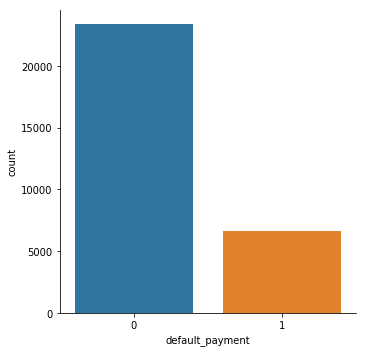

In [99]:
sns.catplot('default_payment', data=df, kind='count');


display(df['default_payment'].value_counts())

print("\n")

print("Ratio of default is  {}".format((df['default_payment']==1).sum()/len(df)))

print("\n")

So basically if our model predicted all not defaults it would still have a 78% accuracy !  So accuracy is not a good metric , we should take a look at kappa score which takes into account the ,True Negatives and False Positives. Also we should start to ask ourselves the following : 


*  What are  the bank interests ? 
 
  1.  If they want to predict the default of it's clients , it might be better to use a model less incline to return false negatives. 
  2. However, if the bank, will then invest resources to prevent the default of its clients, the role of false positives will become more and more relevant.


This should be all taken into account , what I have learned from my experience is that **context** is crucial. 

<br>
<br>

We'll come back to this , for now let's do some data cleaning 






In [14]:
for cat in categoricals: 
  
  print(df[cat].value_counts())


2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: in

Okay we see already we can see here 2 things a little off , from above we know the following :


<br>

* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

* MARRIAGE: Marital status (1=married, 2=single, 3=others)

* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

<br>

We see that there are some issues with our category

<br> 

* EDUCATION

  * 2-    14030

  * 1-    10585

  * 3 -     4917

  * 5-      280

  * 4-      123

  * 6-       51

  * 0-       14  <-  What's this ?  Probably some typo's 

<br>

* MARRIAGE

     * 2-    15964

     * 1-    13659

     * 3-      323

     * 0-       54    <-  Also undocumentaded 

<br>

 * PAY_0,
 
   * 0- 15730  <- what is this ? 
  
   * -1-  6050  
 
   * 2 - 3927  
 
   * -2 -  3782 <- and this ? 

   * 3  -  326
 
   * 4    -   99
 
   * 1    -   28
 
   * 5    -   25
 
   * 7    -   20
 
   *  6   -    12
 
   * 8    -    1



We already see that there is some cleaning needed to be done, you could also plot them if you wish :

                            df[cat].value_counts().plot(kind = 'bar')




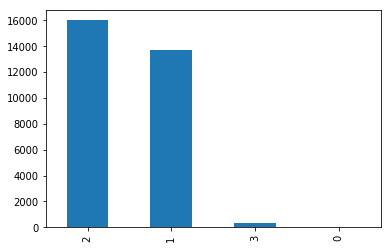

In [15]:

df['MARRIAGE'].value_counts().plot(kind = 'bar')



Moving on with our analysis , let's see if we find some interesting things where we can base ourselve

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


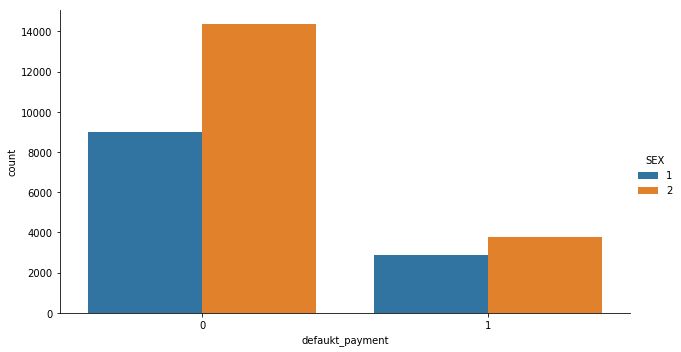

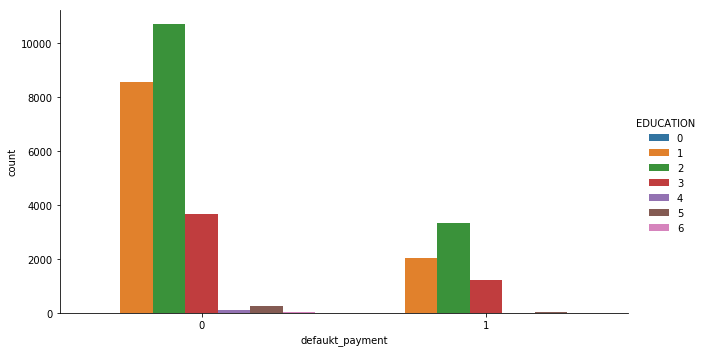

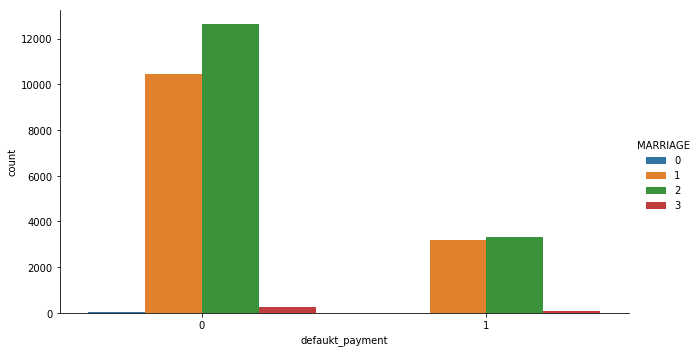

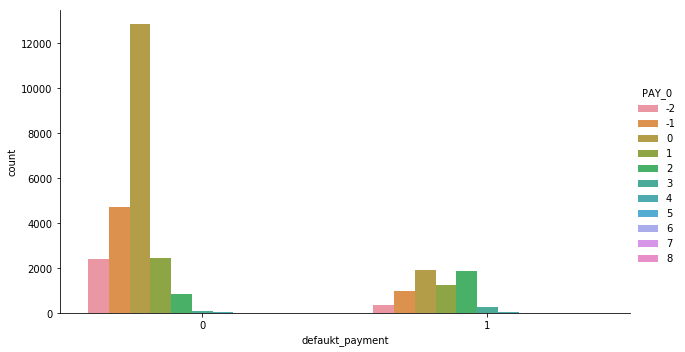

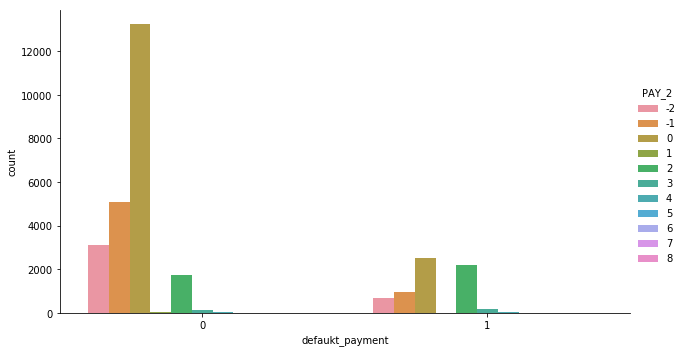

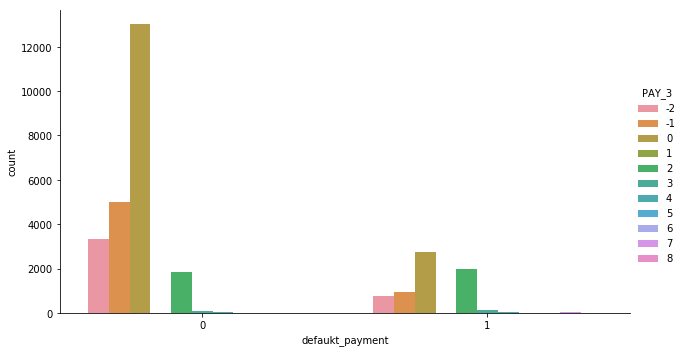

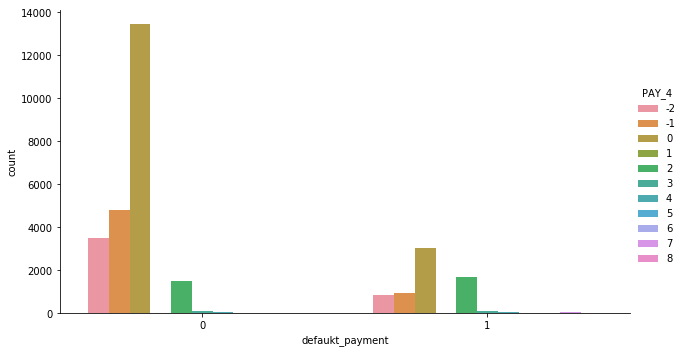

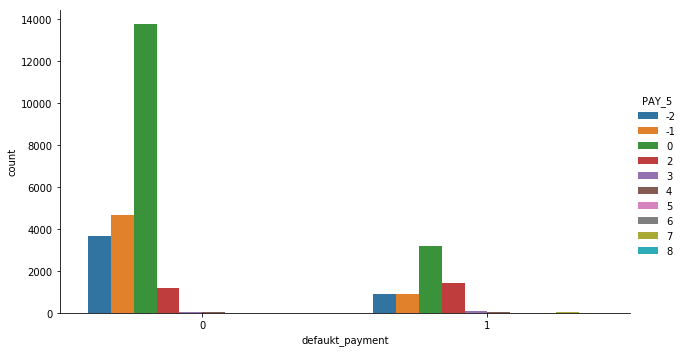

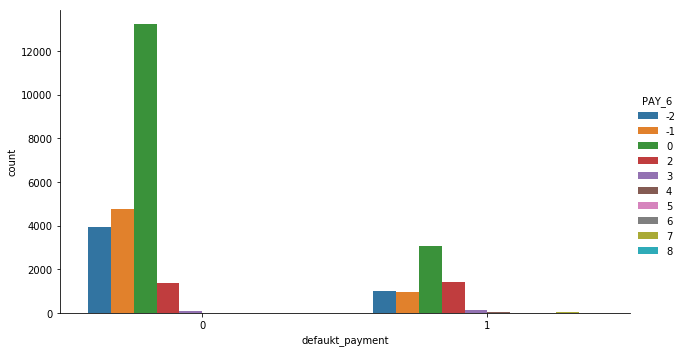

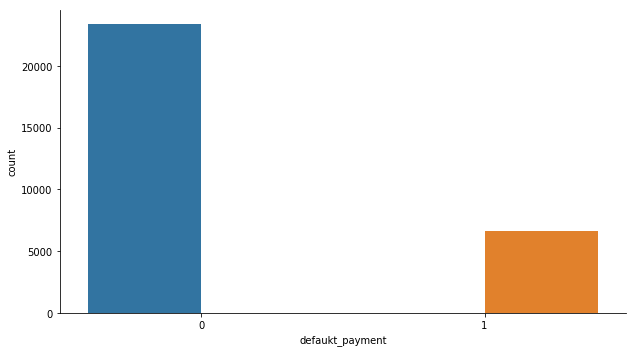

In [16]:
for cats in categoricals:  
  
  if (cats == 'defaul_payment'):
  
    break 
  
  
  g = sns.factorplot('default_payment', data=df, hue= cats, kind='count', aspect=1.75)

  g.set_xlabels('defaukt_payment')
  




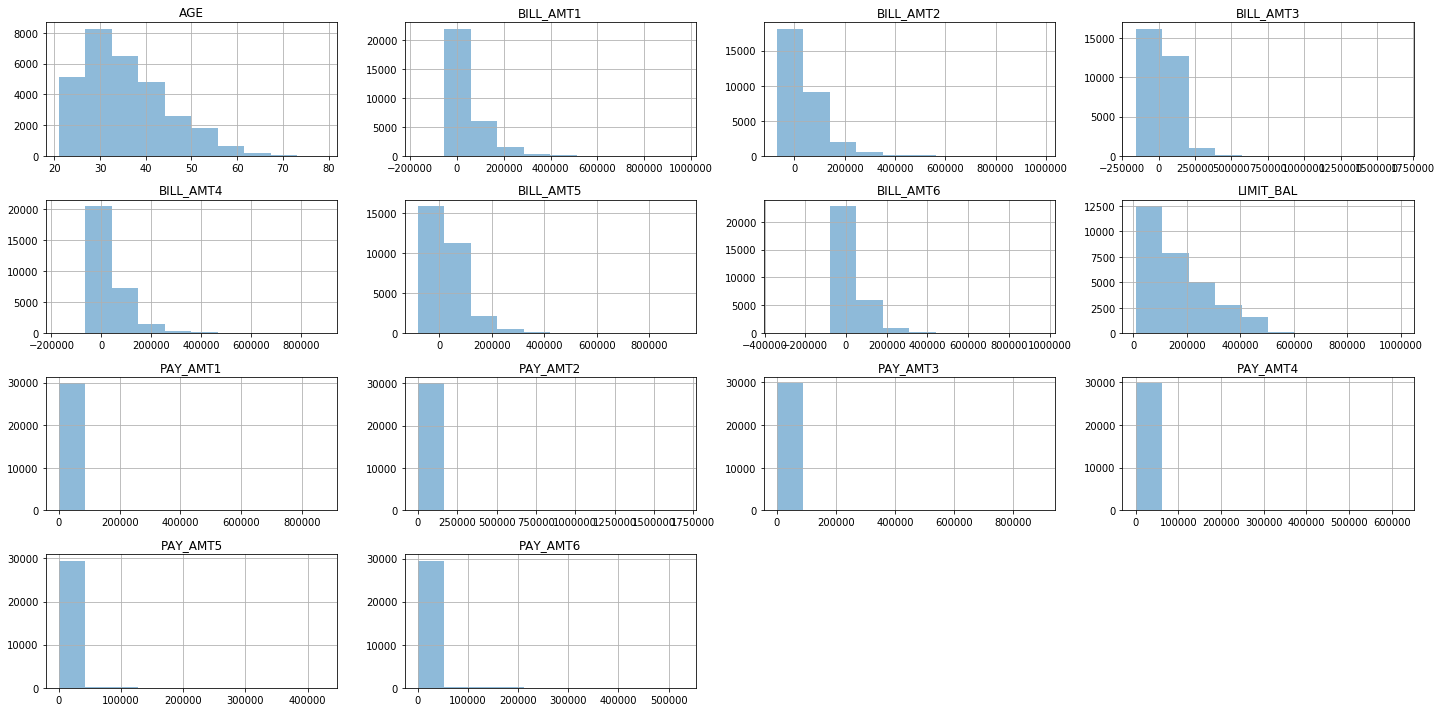

In [17]:
df[numericals].hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()



Let's plot some box plots 

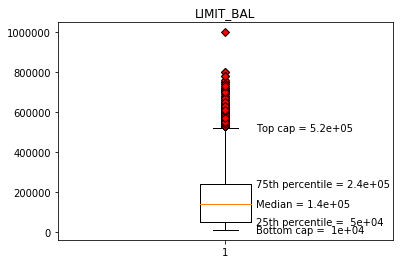

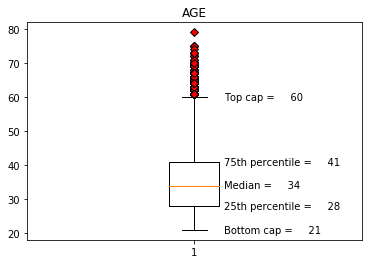

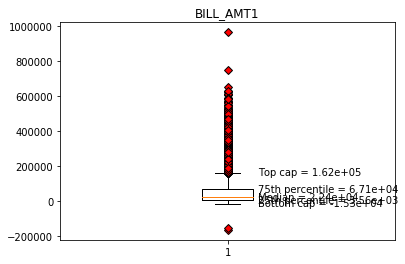

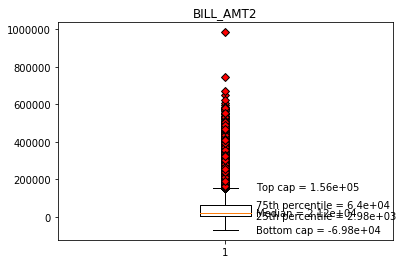

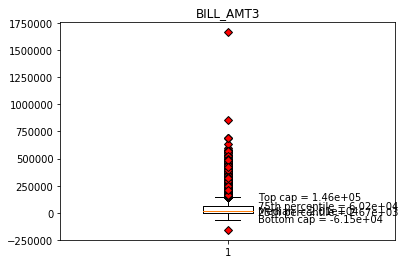

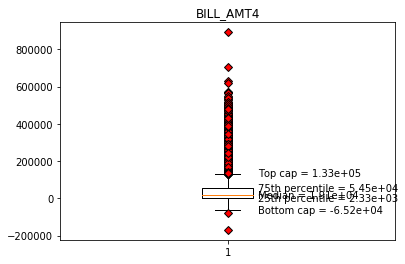

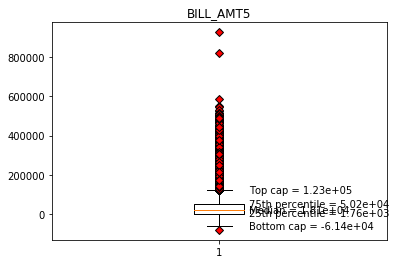

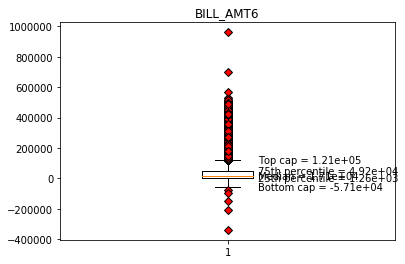

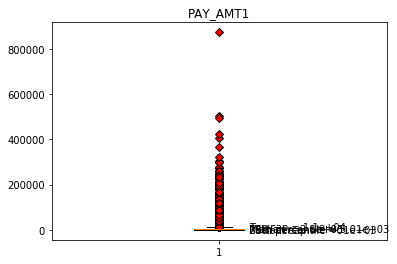

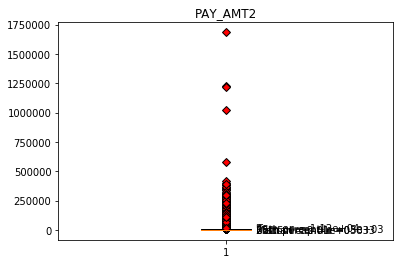

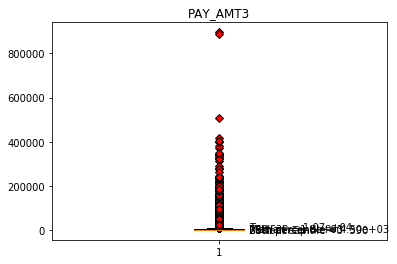

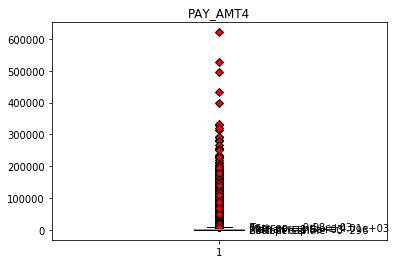

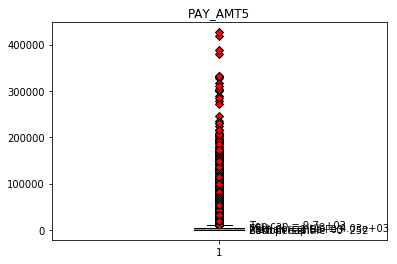

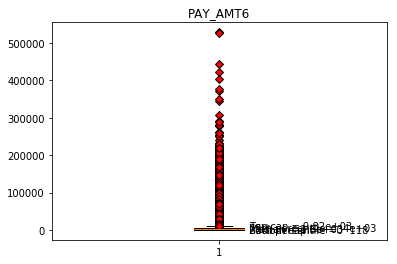

In [18]:
for col in numericals:

  red_diamond = dict(markerfacecolor='r', marker='D')
  fig3, ax3 = plt.subplots()
  ax3.set_title(col)

# Create the boxplot and store the resulting python dictionary
  my_boxes = ax3.boxplot(df[col], flierprops=red_diamond)

# Call the function to make labels
  make_labels(ax3, my_boxes)

plt.show()







It  seems here that we have a lot of "outliers" , but the thing is maybe they aren't outliers at all , they are just high end customers, and business-wise we should be even more carefull with this clients !  It's better to  have 10 default 50000 defaults than a 1000000  default . 

    
 <h5>
    <font size = 6 color = 'white'  >  
      
      
  <h1> <center> Cleaning Data      </center></ h1>
 
  </font>
  </h5>
  <br>
  <br>

Okay let's clean some stuff !




In [19]:

all_pay_cols = [cols for cols in df.columns if  cols.startswith('PAY_')]

                    
pay_ammount_cols = [cols for cols in df.columns if  cols.startswith('PAY_AMT')]

                
pay_cols = list((Counter(all_pay_cols) - Counter(pay_ammount_cols)).elements())

pay_cols




['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [100]:

fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()


df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()



fil = (df.PAY_0 == -2) | (df.PAY_0 == -1) | (df.PAY_0 == 0)
df.loc[fil, 'PAY_0'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0

df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


I renamed the PAY columns this way becasue I intend on creating a new columns that counts how many months the client has delayed payment , and the -1 would actually come up in the way 

    
 <h5>
    <font size = 6 color = 'white'  >  
      
      
  <h1> <center>   Feature engineering      </center></ h1>
 
  </font>
  </h5>
  <br>
  <br>

In [101]:
pay_ammount_cols = [cols for cols in df.columns if  cols.startswith('PAY_AMT')]

df['Total_ammount_paid'] = df[pay_ammount_cols].sum(axis = 1)

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,Total_ammount_paid
0,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,689
1,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,5000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,11018
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,8388
4,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,59049


So here I just basically created a column with total amount that the client has paid to the bank for the past months , next step will be create another one for Bill_AMT , and for the number of months spent , and let's see if we get better results:

In [102]:
bill_cols = [cols for cols in df.columns if  cols.startswith('BILL_')]


df['Total_Bill'] = df[bill_cols].sum(axis = 1)

df['Total_months_delay'] = df[pay_cols].sum(axis = 1)


df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,Total_ammount_paid,Total_Bill,Total_months_delay
0,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,689,7704,4.0
1,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,5000,17077,4.0
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,11018,101653,0.0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,8388,231334,0.0
4,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,59049,109339,0.0


And also let's  create a balance Column :




In [103]:
df['Balance'] = df.apply(lambda x: x['Total_ammount_paid'] - x['Total_Bill'], axis=1)

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,Total_ammount_paid,Total_Bill,Total_months_delay,Balance
0,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,689,7704,4.0,-7015
1,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,5000,17077,4.0,-12077
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,11018,101653,0.0,-90635
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,8388,231334,0.0,-222946
4,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,59049,109339,0.0,-50290


In [104]:
print(len(df[df['Balance'] > 0  ]))
df[df['Balance'] > 0  ].head()

3202


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,Total_ammount_paid,Total_Bill,Total_months_delay,Balance
26,60000,1,1,2,27,1,0,0,0,0,0,-109,-425,259,-57,127,-189,0,1000,0,500,0,1000,1,2500,-394,1.0,2894
33,500000,2,2,1,54,0,0,0,0,0,0,10929,4152,22722,7521,71439,8981,4152,22827,7521,71439,981,51582,0,158502,125744,0.0,32758
37,60000,2,2,2,22,0,0,0,0,0,0,15054,9806,11068,6026,-28335,18660,1500,1518,2043,0,47671,617,0,53349,32279,0.0,21070
67,210000,2,1,2,30,2,0,0,0,0,0,300,300,1159,2280,300,4250,300,1159,2280,300,4250,909,0,9198,8589,2.0,609
68,130000,2,3,2,29,1,0,0,0,2,0,-190,-9850,-9850,10311,10161,7319,0,0,20161,0,7319,13899,0,41379,7901,3.0,33478


In [105]:
print(len(df[df['Total_Bill'] < 0  ]))
df[df['Total_Bill'] < 0  ].head()

201


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,Total_ammount_paid,Total_Bill,Total_months_delay,Balance
26,60000,1,1,2,27,1,0,0,0,0,0,-109,-425,259,-57,127,-189,0,1000,0,500,0,1000,1,2500,-394,1.0,2894
109,360000,1,2,1,35,1,0,0,0,0,0,-103,-103,-103,-103,-103,-103,0,0,0,0,0,0,0,0,-618,1.0,618
173,50000,2,1,2,24,1,0,0,0,0,0,-709,-709,-709,-2898,-3272,-3272,0,0,0,0,0,0,1,0,-11569,1.0,11569
216,240000,2,2,1,36,1,0,0,0,0,0,-946,-946,-946,-946,-946,-946,0,0,0,0,0,0,1,0,-5676,1.0,5676
290,280000,1,1,2,33,0,0,0,0,0,0,898,898,325,898,325,-339603,898,325,898,325,0,345293,1,347739,-336259,0.0,683998


In [106]:
df.loc[df['default_payment'] == 1 , ['LIMIT_BAL','Total_ammount_paid','default_payment'] ].head() 

,LIMIT_BAL,Total_ammount_paid,default_payment
0,20000,689,1
1,120000,5000,1
13,70000,10700,1
16,20000,6350,1
21,120000,1580,1


Let's train our model with our new features , and see if we get any improvements on the kappa score :



In [0]:
f_cols = ['LIMIT_BAL' ,'SEX' , 'EDUCATION' , 'MARRIAGE' 	 , 'AGE'	,'Total_ammount_paid' , 'Total_Bill' , 'Total_months_delay' , 'Balance']

t_cols = ['default_payment']


In [108]:
X = df[f_cols]
y = df[t_cols]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=27,shuffle=True)

print("train has {} features".format(len(X_train.columns)))

print("test has {} features".format(len(X_test.columns)))

X.columns

train has 9 features
test has 9 features


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'Total_ammount_paid', 'Total_Bill', 'Total_months_delay', 'Balance'],
      dtype='object')

In [109]:
rfc = RandomForestClassifier(n_estimators = 100 , verbose = 2,n_jobs=-1) 


rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)


feature_ranking = dict(zip(X_train.columns ,list(rfc.feature_importances_) ))

print("\n")
print("Confusion Matrix")
print(confusion_matrix(predictions,y_test))
print("\n")
print("Accuracy is",accuracy_score(predictions,y_test))
print("\n")
print("Kappa is",cohen_kappa_score(predictions,y_test))
print("\n")
print("Feature ranking \n  : {}".format(feature_ranking))







/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100building tree 6 of 100

building tree 8 of 100building tree 7 of 100

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.4s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s




Confusion Matrix
[[4335  898]
 [ 341  426]]


Accuracy is 0.7935


Kappa is 0.2930089099517412


Feature ranking 
  : {'LIMIT_BAL': 0.10573966931020952, 'SEX': 0.021816363215999477, 'EDUCATION': 0.03589037521436534, 'MARRIAGE': 0.02278927460737703, 'AGE': 0.12804011687556663, 'Total_ammount_paid': 0.1790919724762407, 'Total_Bill': 0.1652350306004157, 'Total_months_delay': 0.18038896292063225, 'Balance': 0.16100823477919335}


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


This was expected , ofcourse , we lost aloss of information 

In [38]:

rfc = RandomForestClassifier(n_estimators = 100 , verbose = 2,n_jobs=-1) 

scaler = StandardScaler()

scaler.fit(X_train)

X_train_s = scaler.transform(X_train)

X_test_s = scaler.transform(X_test)

rfc.fit(X_train_s,y_train)

predictions = rfc.predict(X_test_s)

print("Confusion Matrix")
print(confusion_matrix(predictions,y_test))
print("Accuracy is",accuracy_score(predictions,y_test))
print("Kappa's : ",cohen_kappa_score(predictions,y_test))

print("\n")



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.5s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


Confusion Matrix
[[4380  826]
 [ 296  498]]
Accuracy is 0.813
Kappa's :  0.36523430133530876




Nada ! Not better nor worse , let's try another to dummify , also I'll get read of our new columns , they are just increasing computation cost 

In [0]:

df.drop(df.columns[24:28], axis=1, inplace=True)

In [45]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment'],
      dtype='object')

In [48]:
df_dum = pd.get_dummies(df , columns=['SEX' , 'EDUCATION', 'MARRIAGE', 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']  , prefix =  ['SEX' , 'EDUCATION', 'MARRIAGE', 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']   )


X,y = X_Y(df_dum,'default_payment')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42,shuffle=True)

print("train has {} features".format(len(X_train.columns)))

print("test has {} features".format(len(X_test.columns)))


train has 91 features
test has 91 features


In [50]:

rfc = RandomForestClassifier(n_estimators = 100 , verbose = 2,n_jobs=-1) 

scaler = StandardScaler()

scaler.fit(X_train)

X_train_s = scaler.transform(X_train)

X_test_s = scaler.transform(X_test)

rfc.fit(X_train_s,y_train)

predictions = rfc.predict(X_test_s)

print("Confusion Matrix")
print(confusion_matrix(predictions,y_test))
print("Accuracy is",accuracy_score(predictions,y_test))
print("Kappa's : ",cohen_kappa_score(predictions,y_test))

print("\n")



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.9s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s


Confusion Matrix
[[4409  822]
 [ 278  491]]
Accuracy is 0.8166666666666667
Kappa's :  0.3697843688571879




[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


Still nothing ! I'll play my trumph card now:


 <h5>
    <font size = 6 color = 'white'  >  
      
      
  <h1> <center>  Upsample     </center></ h1>
 
  </font>
  </h5>
  <br>
  <br>
  
  
  There are three ways of dealing with class imbalance ( that I know of) :
  

*   DownSample
*   UpSample
*   SMOTE (Synthetic Minority Oversampling , Technique) creates fake minority classes.

<br>
<br>

Out of this three, oversampled proved to be the best 



In [54]:
X,y = X_Y(df,'default_payment')


# Separate input features and target

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_default = X[X.default_payment==0]
default = X[X.default_payment==1]

# upsample minority
default_upsampled = resample(default,
                          replace=True, # sample with replacement
                          n_samples=len(not_default), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_default, default_upsampled])

# check new class counts
upsampled.default_payment.value_counts()
    

1    18688
0    18688
Name: default_payment, dtype: int64

In [56]:
y_train = upsampled.default_payment
X_train = upsampled.drop('default_payment', axis=1)

y_test.value_counts()

0    4676
1    1324
Name: default_payment, dtype: int64

In [83]:

rfc = RandomForestClassifier(n_estimators = 1000 , verbose = 2,n_jobs=-1) 


rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(predictions,y_test))
print("\n")
print("Accuracy is",accuracy_score(predictions,y_test))
print("\n")
print("Kappa is",cohen_kappa_score(predictions,y_test))
print("\n")



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 1000building tree 2 of 1000

building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000building tree 6 of 1000

building tree 7 of 1000building tree 8 of 1000

building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 22 of 1000
building tree 21 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.7s


building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000building tree 62 of 1000

building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   11.7s


building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   26.8s


building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   47.9s


building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.2min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    1.0s


Confusion Matrix
[[4271  738]
 [ 405  586]]


Accuracy is 0.8095


Kappa is 0.3912566777136389




[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.5s finished


In [0]:
df_dum = pd.get_dummies(df , columns=['SEX' , 'EDUCATION', 'MARRIAGE', 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']  , prefix =  ['SEX' , 'EDUCATION', 'MARRIAGE', 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']   )


X,y = X_Y(df_dum,'default_payment')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_default = X[X.default_payment==0]
default = X[X.default_payment==1]

# upsample minority
default_upsampled = resample(default,
                          replace=True, # sample with replacement
                          n_samples=len(not_default), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_default, default_upsampled])

# check new class counts
upsampled.default_payment.value_counts()


y_train = upsampled.default_payment
X_train = upsampled.drop('default_payment', axis=1)

In [74]:
X_train.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2',
       'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8',
       'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3',
       'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2',
       'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4',
       'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1',
       'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0',
       'PAY_5_2', 'PAY_5_3', 'PAY

In [81]:
from xgboost import XGBClassifier


xgbc = XGBClassifier(objective= 'binary:logistic' ,verbosity = 2 , n_jobs = -1 
                     ,eta = 0.039 )


xgbc.fit(X_train,y_train)

predictions = xgbc.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(predictions,y_test))
print("\n")
print("Accuracy is",accuracy_score(predictions,y_test))
print("\n")
print("Kappa is",cohen_kappa_score(predictions,y_test))
print("\n")


[20:40:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[20:40:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[20:40:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[20:40:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[20:40:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[20:40:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[20:40:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[20:40:19] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

    
 <h5>
    <font size = 6 color = 'white'  >  
      
      
  <h1> <center>   Next steps      </center></ h1>
 
  </font>
  </h5>
  <br>
  <br>
  
  
  

1.   Use K-fold Validation for hypertuning 
2.  Try different models 
3.  NN with keras 


 
 
 